# Week 2
# Aidin Attar - 2048654

### Table of contents:
- [Exercise 1 - Concentration of a contaminant in tap water](#ex1)
- [Exercise 2 - The waiting time at the doctor](#ex2)
- [Exercise 3 - Books' typos](#ex3)
- [Exercise 4 - Aces in a deck of cards](#ex4)
- [Exercise 5 - University orientation and evaluation test time](#ex5)
- [Exercise 6 - The lifetime of tires](#ex6)

## Exercise 1 - Concentration of a contaminant in tap water<a class="anchor" id="ex1"></a>

In [1]:
x   <- c(15.58, 15.9, 16, 16.1, 16.2)
p1  <- c(.15, .21, .35, .15, .14)
p2  <- c(.14, .05, .64, .08, .09)

#E[x] = Σxp(x)
E_x1 <- sum(x*p1)
E_x2 <- sum(x*p2)


#Var[x] = E[x^2] - E^2[x] = Σx^2p(x) - (Σxp(x))^2
Var1 <- sum(x*x*p1) - E_x1^2 
Var2 <- sum(x*x*p2) - E_x2^2 

cat("Method 1: \nE(x):\t", round(E_x1, 3), "\nVar(x):\t", round(Var1, 3), "\n\n")
cat("Method 2: \nE(x):\t", round(E_x2, 3), "\nVar(x):\t", round(Var2, 3), "\n\n")

Method 1: 
E(x):	 15.959 
Var(x):	 0.034 

Method 2: 
E(x):	 15.962 
Var(x):	 0.028 



## Exercise 2 - The waiting time at the doctor<a class="anchor" id="ex2"></a>

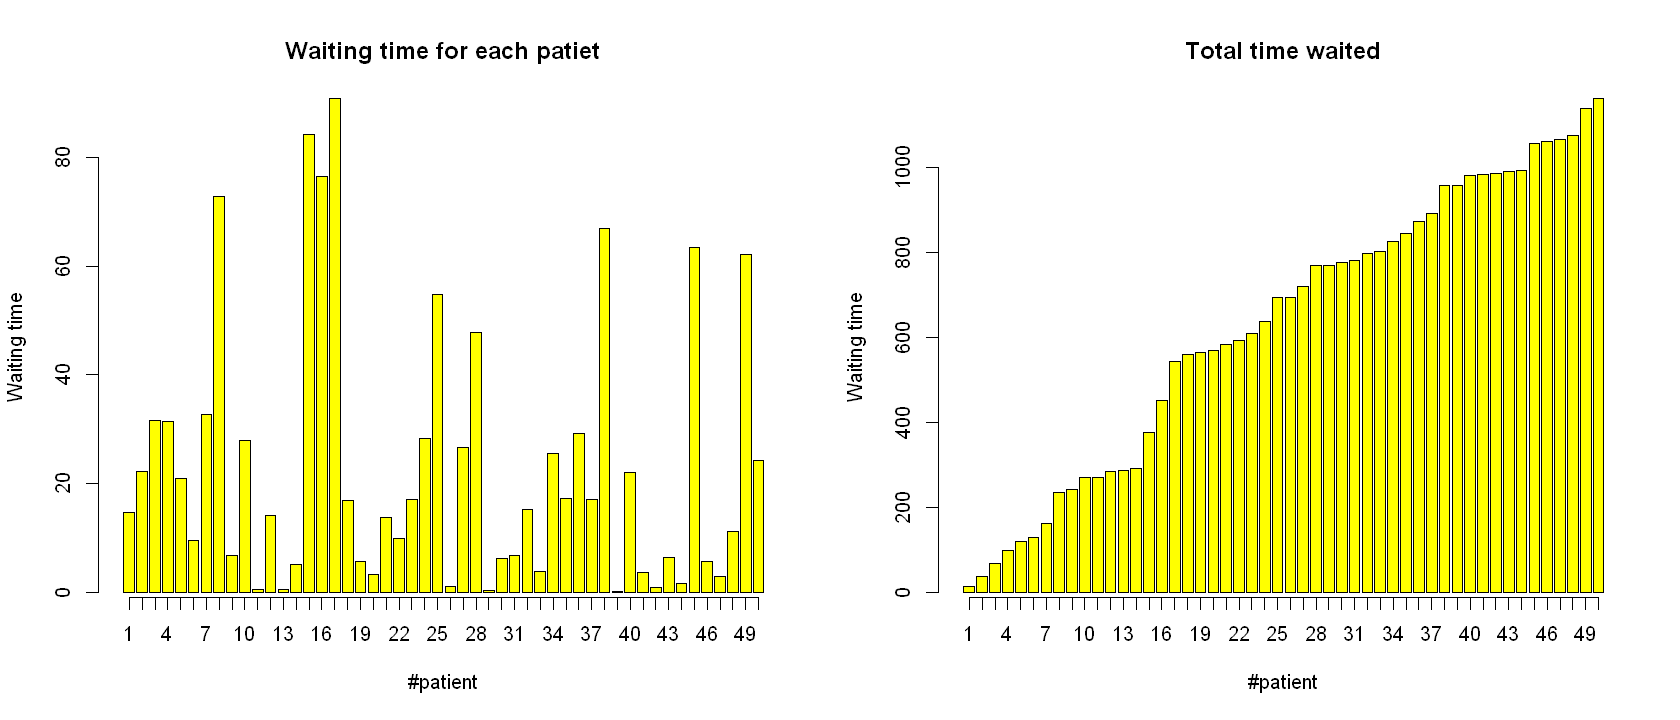

In [24]:
waiting_time <- 30 # minutes
rate         <- 1 / 30
people       <- 50

x <- 1:people

# random generation based on exponential distribution
distr <- rexp(x, rate)

# layout of the plot
par(mfrow = c(1,2))
options(repr.plot.width = 14, repr.plot.height = 6)

# plot of the waiting time simulated
wt <- barplot(distr,col="yellow", main="Waiting time for each patiet", xlab="#patient", ylab="Waiting time")
axis(1,at=wt,labels = x)

# plot of the total time in which the doctor worked
cwt <- barplot(cumsum(distr),col="yellow",main="Total time waited", xlab="#patient", ylab="Waiting time")
axis(1,at=cwt,labels = x)

In [25]:
# cumulative probability till 10 minutes
cat("The probability that a person will wait for less that 10 minutes is: \n",pexp(10, rate), "\n\n")

# probability that a person will NOT wait for less than one hour (60 minutes)
cat("The probability that a person will wait for more than one hour is: \n", 1 - pexp(60, rate))

The probability that a person will wait for less that 10 minutes is: 
 0.2834687 

The probability that a person will wait for more than one hour is: 
 0.1353353

Average waiting time for the simulated data: 	 23.22972 minutes.

Average theoretical waiting time: 	  30 minutes.

Average waiting time distribution:

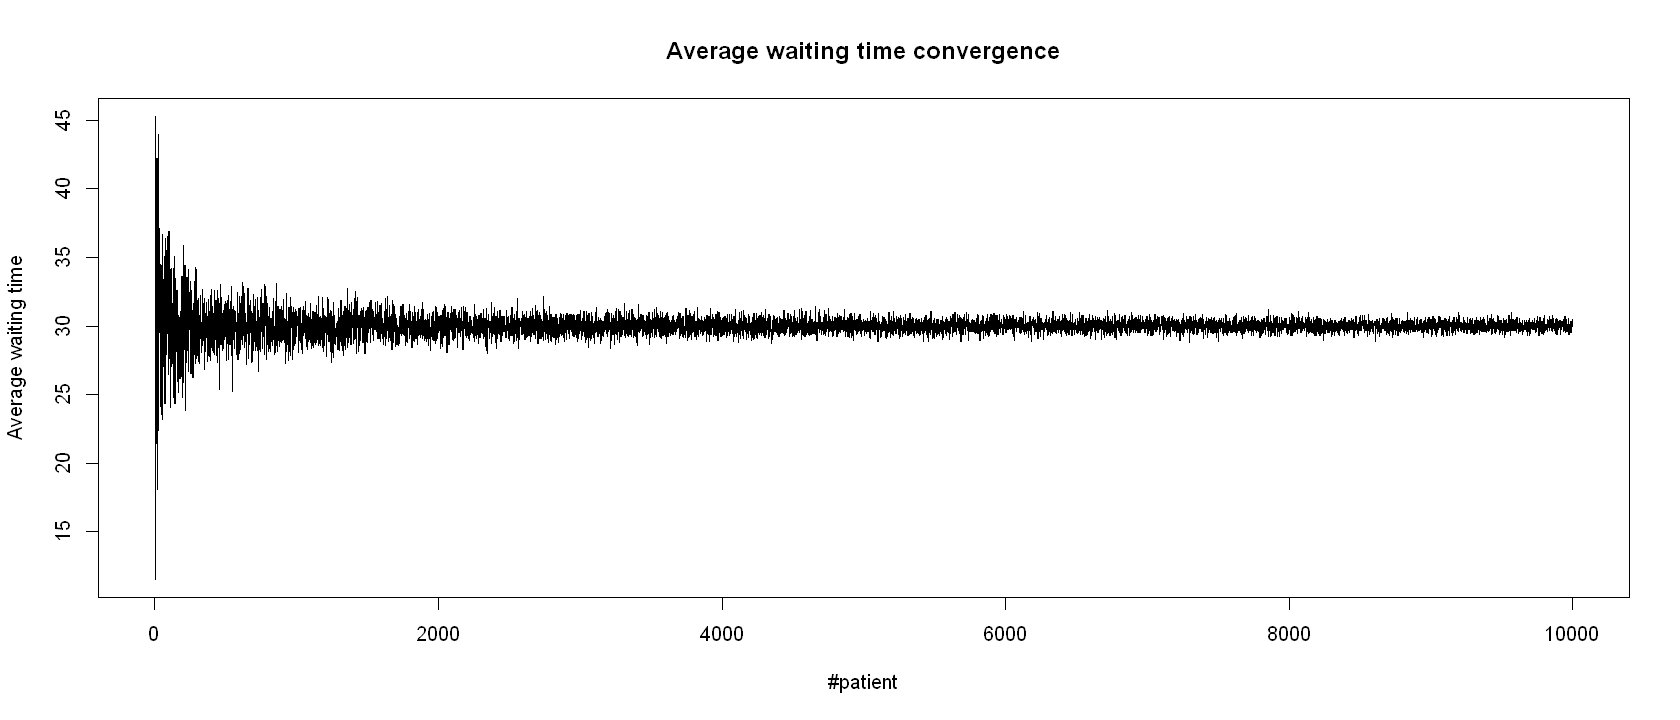

In [26]:
cat("Average waiting time for the simulated data: \t", mean(distr), "minutes.")
cat("\n\nAverage theoretical waiting time: \t ", 1/rate, "minutes.")

# convergence of the mean to the real value
cat("\n\nAverage waiting time distribution:")

x<-1:10000
mea<-rep(NA, 10000)

for (k in x){
    mea[k]<-mean(rexp(1:k, rate))
}

pl_mea <- plot(x, mea,type = "S",main="Average waiting time convergence", xlab="#patient", ylab="Average waiting time")

## Exercise 3 - Books' typos<a class="anchor" id="ex3"></a>

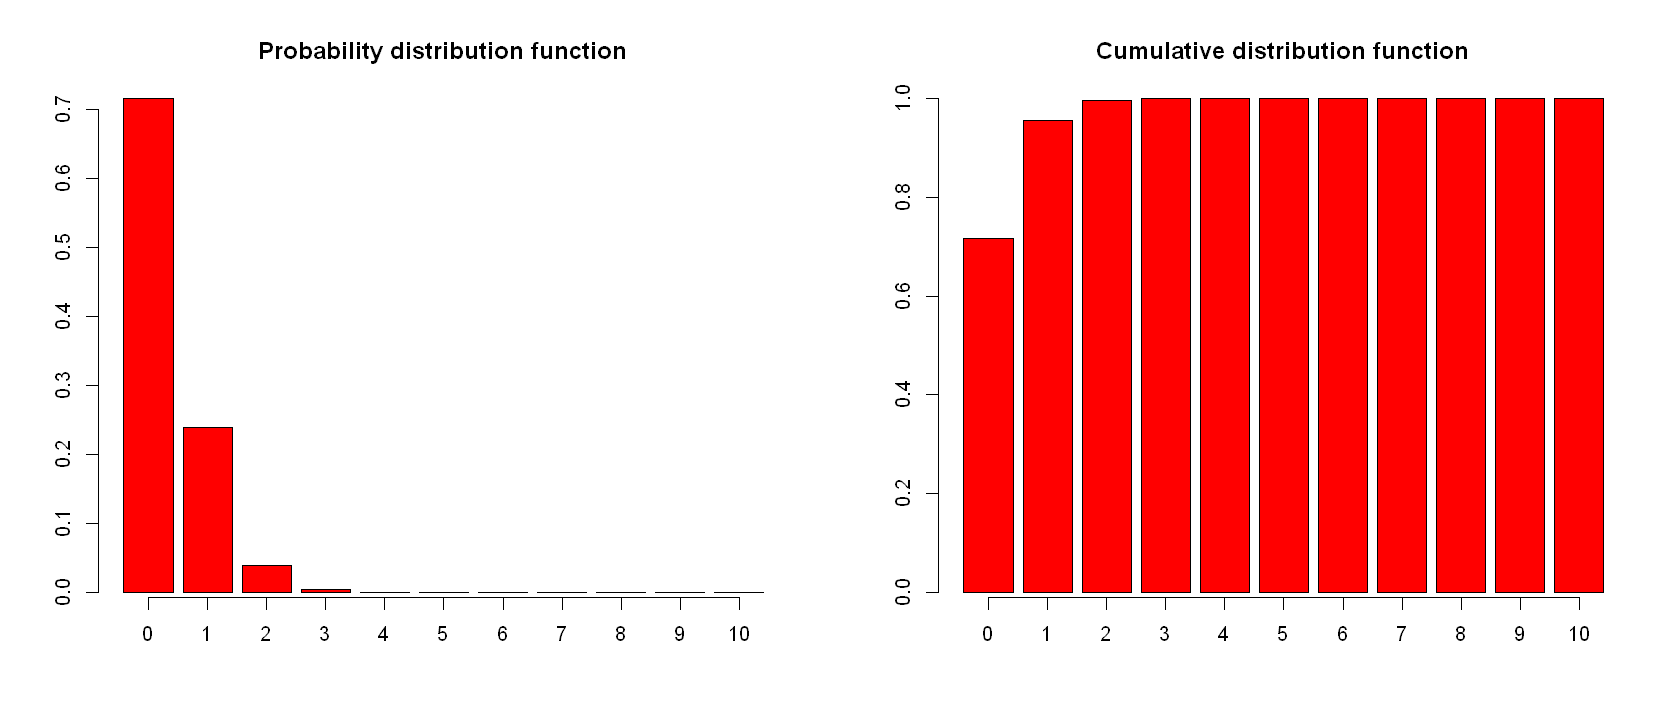

In [27]:
error_rate <- 1/3

# layout of the plot
par(mfrow = c(1,2))
pdf <- barplot(dpois(0:10, error_rate), col = "red",
               main = "Probability distribution function")
axis(1,at=pdf,labels = 0:10)

cdf <- barplot(ppois(0:10, error_rate), col = "red",
               main = "Cumulative distribution function")
axis(1,at=cdf,labels = 0:10)

In [28]:
# probability that there are NOT zero error
cat("Probability that there is at least one error on a specific page:\t", 1-dpois(0, error_rate))

Probability that there is at least one error on a specific page:	 0.2834687

## Exercise 4 - Aces in a deck of cards<a class="anchor" id="ex4"></a>

In [29]:
cards <- 52
aces  <- 4
p     <- aces/cards
draws <- 10

# Probability that there will NOT be an ace in the first 10 cards
cat("Probability of needing to draw at least 10 cards before drawing an ace:\t",1-pgeom(10, p))

Probability of needing to draw at least 10 cards before drawing an ace:	 0.4145881

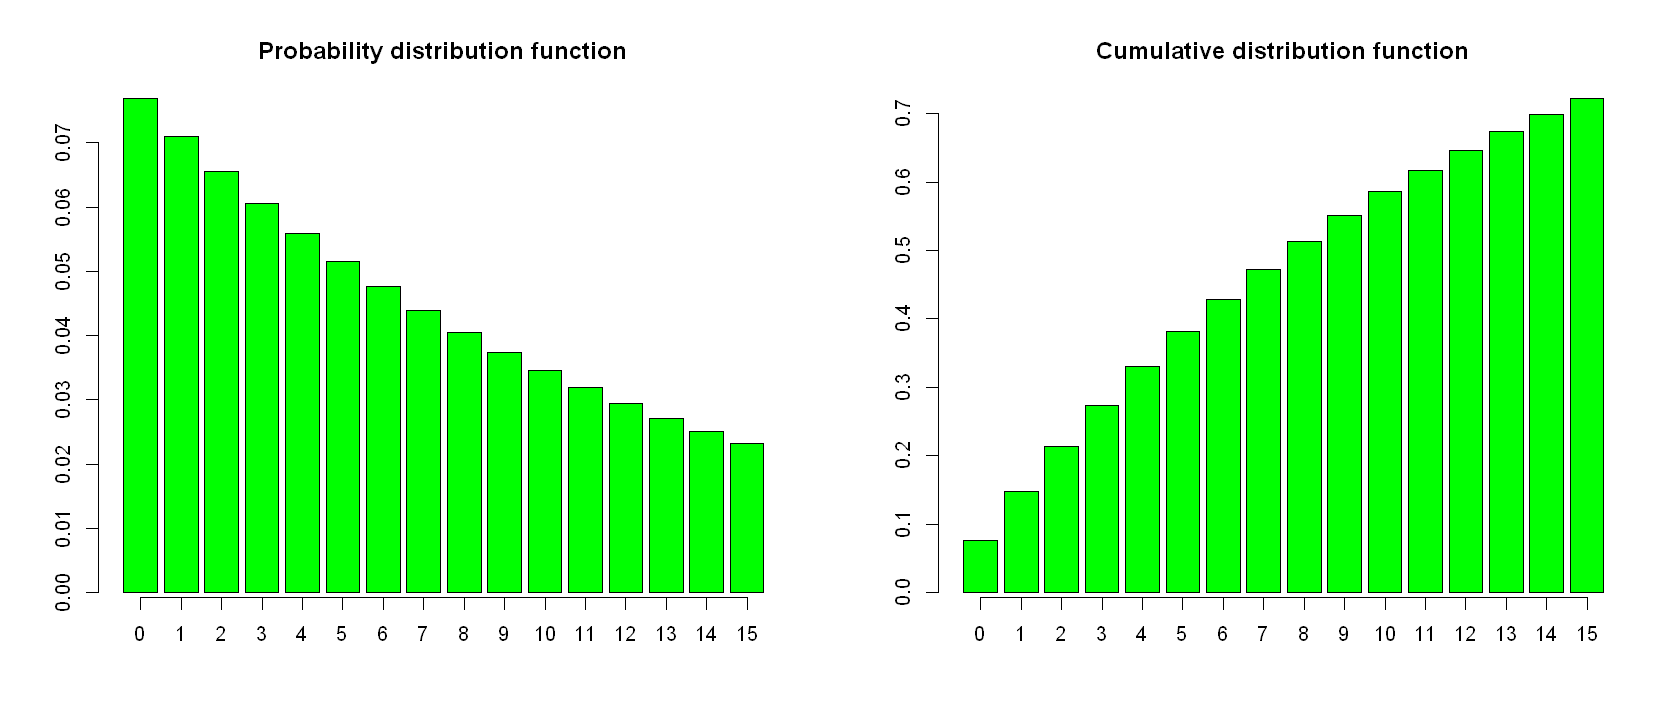

In [30]:
par(mfrow = c(1,2))
pdf <- barplot(dgeom(0:15, p), col = "green",
               main = "Probability distribution function")
axis(1,at=pdf,labels = 0:15)

cdf <- barplot(pgeom(0:15, p), col = "green",
               main = "Cumulative distribution function")
axis(1,at=cdf,labels = 0:15)

## Exercise 5 - University orientation and evaluation test time<a class="anchor" id="ex5"></a>

In [9]:
f <- function(t,c=1){
    # no ternary operator? :(
    # return ( t < 2 && t > 1 ? c*(t-1)*(2-t) : 0 )
    return(ifelse(t < 2 && t > 1, c*(t-1)*(2-t), 0))
}

In [10]:
c <- 1 / integrate(Vectorize(f), -Inf, +Inf)$value
cat("Normalization:\t", c)

Normalization:	 6

$\int_{-\infty}^\infty f(t)dt=1$

$c\int_{1}^2 (t-1)(2-t)dt=1$

$c = \frac{1}{\int_{1}^2 3t-2-t^2}$

$c = \frac{1}{ \frac{1}{6}} = 6 $

In [11]:
library('polynom')

dcustom <- function(t){
    return(ifelse(t < 2 && t > 1, c*(t-1)*(2-t), 0))
}

pcustom <- function(t){
    return(ifelse(t < 2 && t > 1, c*(3/2*t^2-t^3/3-2*t+5/6), ifelse(t >= 2, 1, 0)))
}

# unfortunately the solution is very hard to find, and using a solver i find some complex
# solutions, i use the function solve and the polynomial method to find the zeros of the
# polynomia
qcustom <- function(p){
    f = polynomial(c(1/3,-3/2,2,p/c-5/6))
    return(Re(solve(f)[3]))
}

rcustom <- function(n){
    us <- runif(n)
    return(sapply(us, qcustom))
}

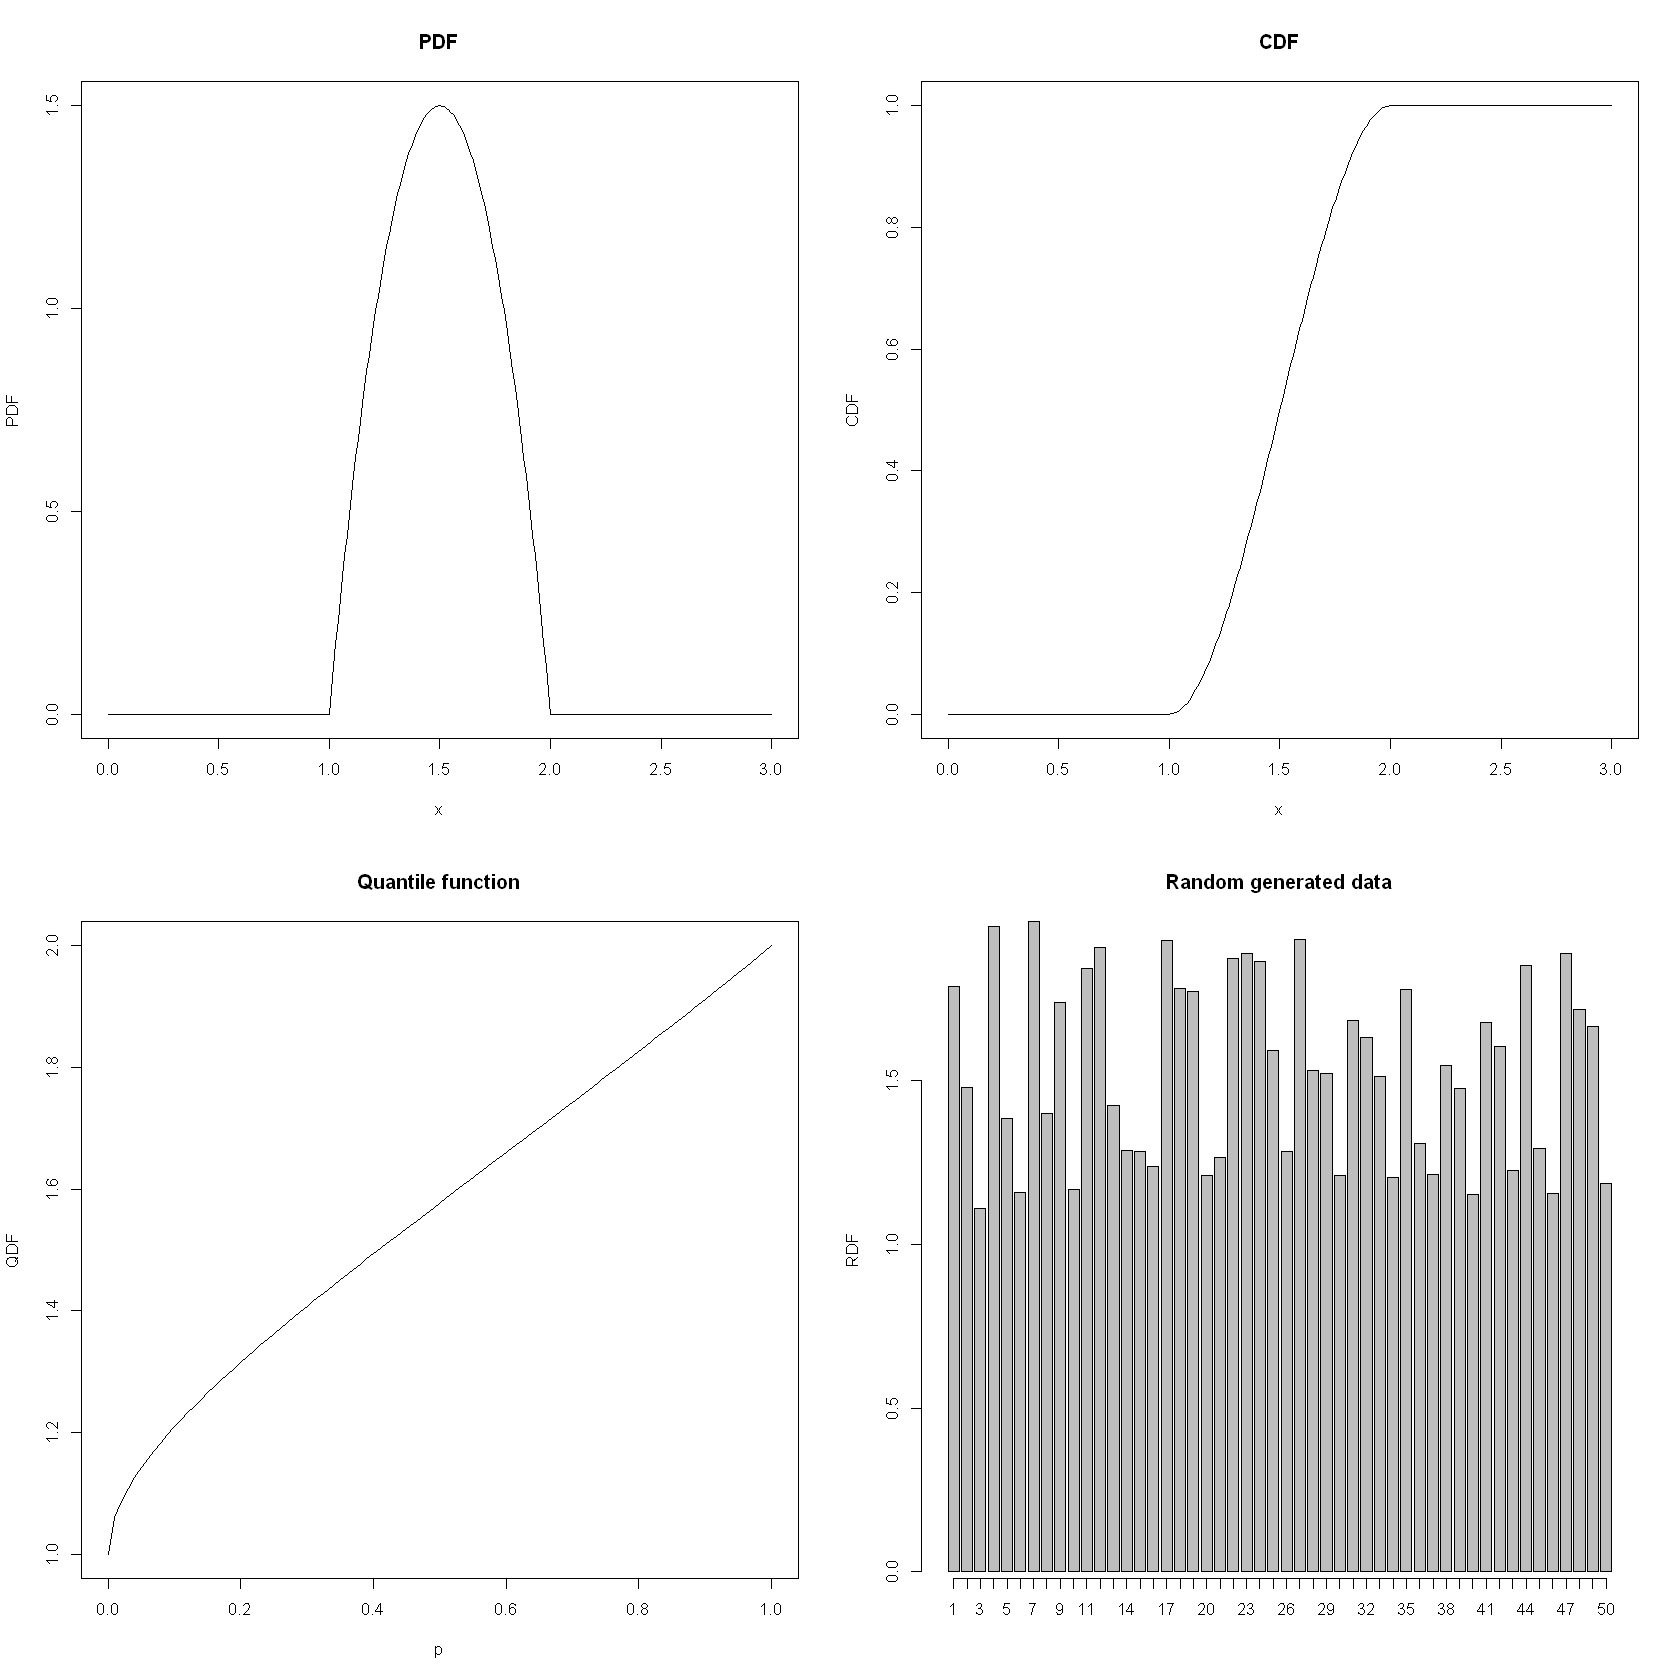

In [32]:
par(mfrow = c(2,2))
options(repr.plot.width = 14, repr.plot.height = 14)
x <- seq(0,3,.01)
plot(x, sapply(x, dcustom), type='l', main='PDF', ylab = "PDF")
plot(x, sapply(x, pcustom), type='l', main='CDF', ylab = "CDF")
p <- seq(0,1,.01) 
plot(p, sapply(p, qcustom), type='l', main='Quantile function', ylab = "QDF")
N = 50
rdm = barplot(rcustom(50), main='Random generated data', ylab = "RDF")
axis(1,at=rdm,labels = 1:50)

In [13]:
cat("Probability that a student will finish in more than 75 minutes:\n", 1-pcustom(75/60))
cat("\n\nProbability that a student will need between 90 and 120 minutes is :\n", 1-pcustom(90/60))
# 120 is the maximum time --> 1-prob = 0

# the probability of a student to take exactly 90 or 120 minutes is the probability of a single event 
# in a continuos distribution. This means that in a continuous probability distribution, 
# the chance of a single event happening is equal to 0.

Probability that a student will finish in more than 75 minutes:
 0.84375

Probability that a student will need between 90 and 120 minutes is :
 0.5

## Exercise 6 - The lifetime of tires<a class="anchor" id="ex6"></a>

In [14]:
dtires <- function(x){
    return(ifelse(x>1 && x<2, 2/x^2, 0))
}

ptires <- function(x){
    return(ifelse(x>1 && x<2,-2/x+2, ifelse(x<=1, 0, 1)))
}

qtires <- function(p){
    return(2/(2-p))
}

rtires <- function(N){
    us <- runif(N)
    return(sapply(us, qtires))
}

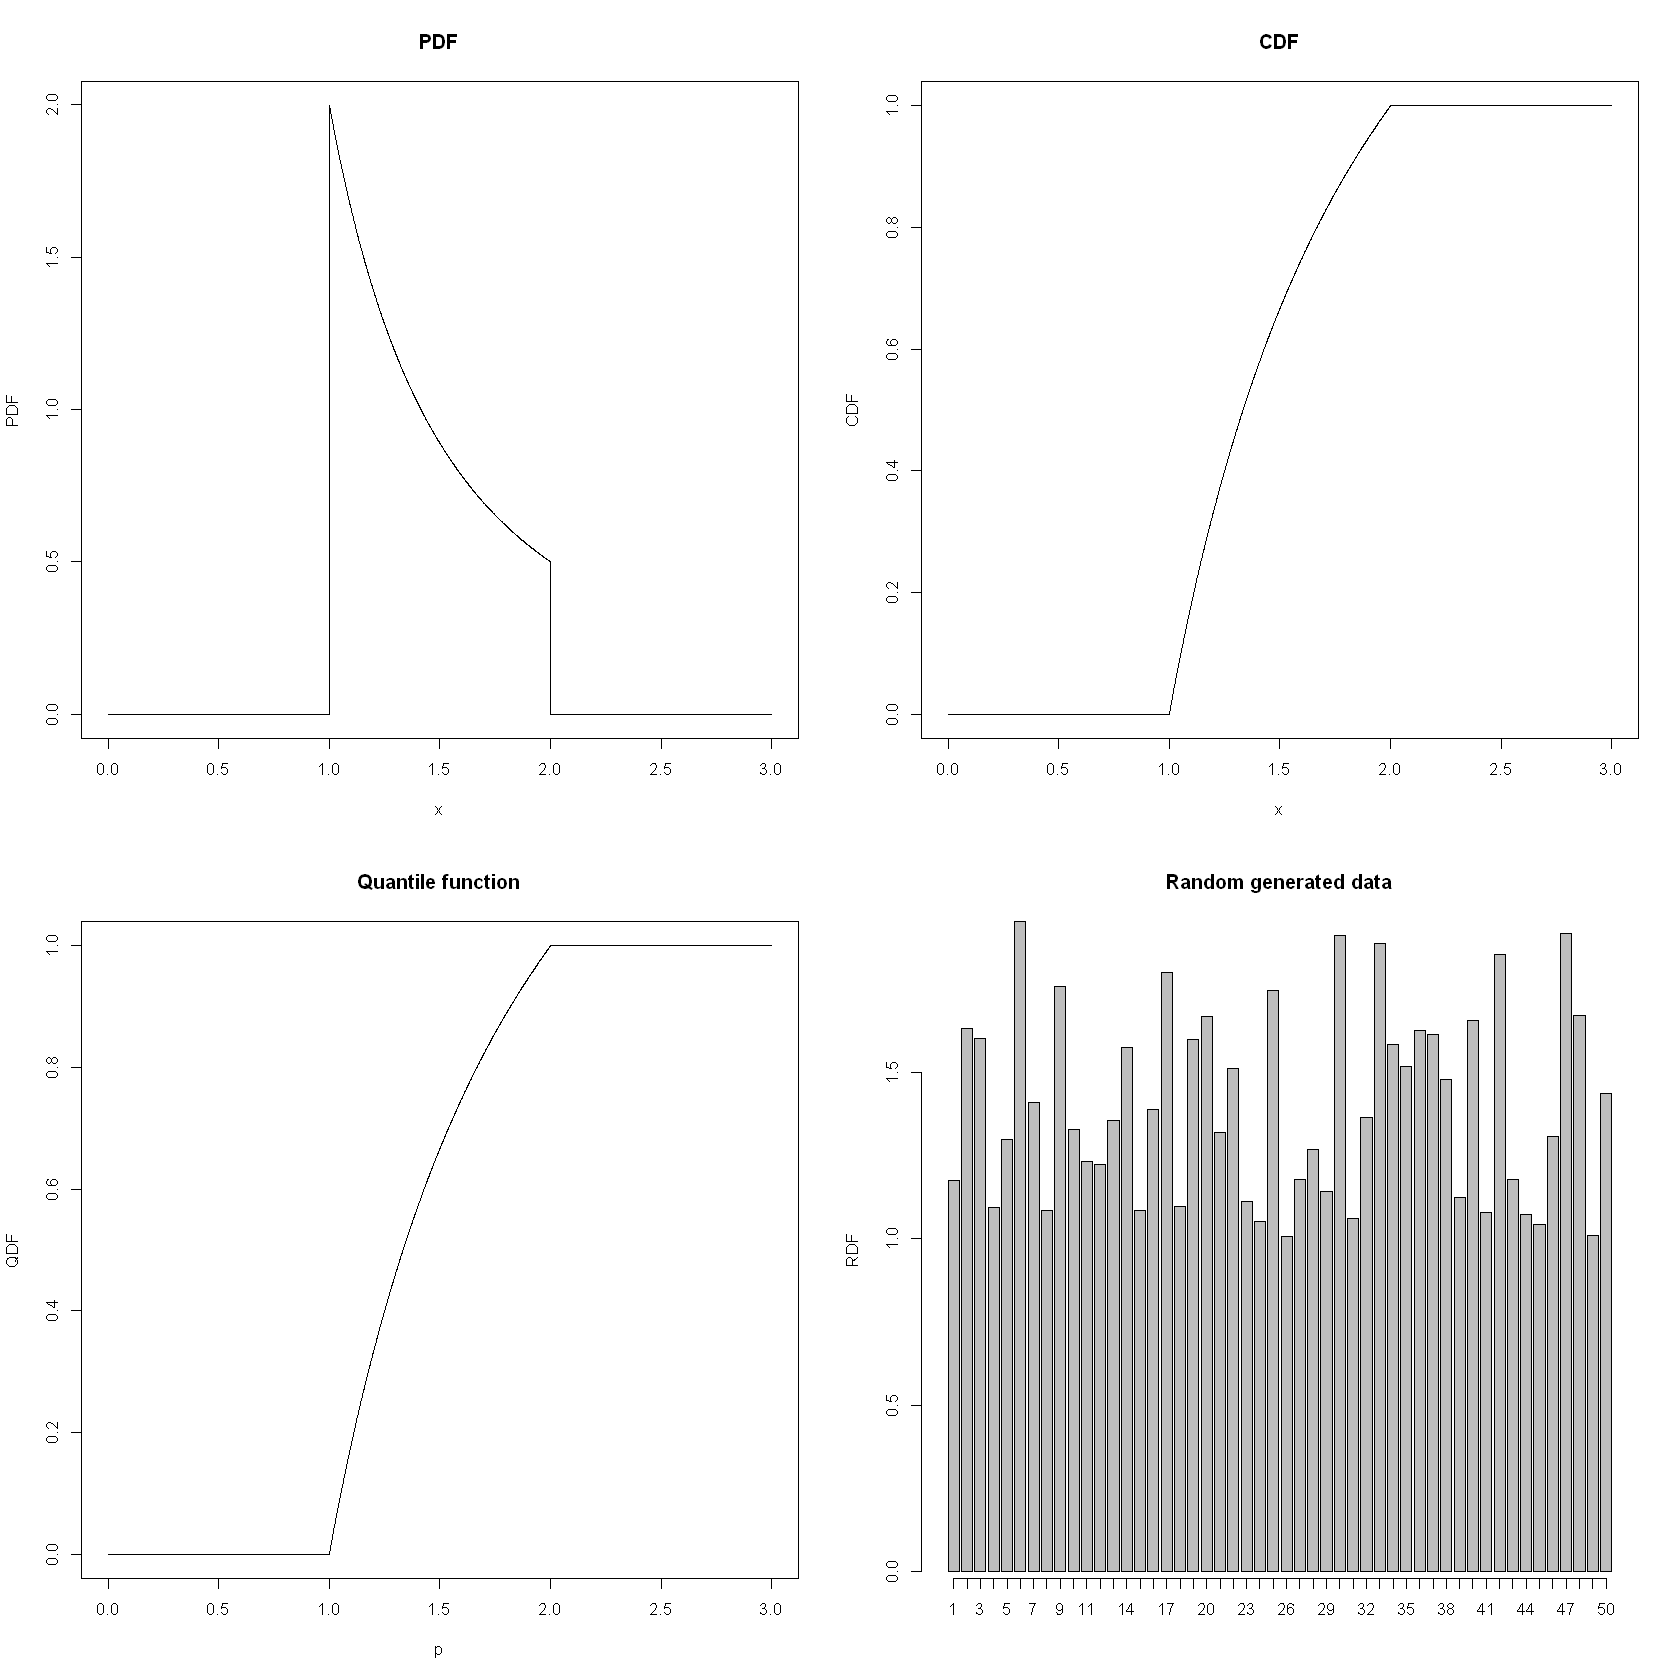

In [33]:
par(mfrow = c(2,2))
x <- seq(0,3,.001)
plot(x, sapply(x, dtires), type='l', main='PDF', ylab = "PDF")
plot(x, sapply(x, ptires), type='l', main='CDF', ylab = "CDF")
p <- seq(0,3,0.001) 
plot(p, sapply(p, ptires), type='l', main='Quantile function', ylab = "QDF")
N = 50
rdm = barplot(rtires(50), main='Random generated data', ylab = "RDF")
axis(1,at=rdm,labels = 1:50)

In [16]:
cat("Probability that tires will last less than 15000 km:\n", ptires(15e4/10e4))

Probability that tires will last less than 15000 km:
 0.6666667

In [17]:
N    <- 3000
cat("--------Generation of ", N, " samples--------")
rand <- rtires(N)
cat("\n\nMean value:\n", mean(rand))
#cat("\n\nVariance:\n", var(rand))
cat("\n\nVariance:\n", mean(rand^2)-mean(rand)^2)

--------Generation of  3000  samples--------

Mean value:
 1.386903

Variance:
 0.07704088

$E[x] = \int_{-\infty}^{+\infty}x*f(x) = \int_{1}^{2}x\frac{2}{x^2} = 2\log x \Big|_1^2 = 2\log 2$

In [18]:
cat(2*log(2))

1.386294

$Var[x] = E[x^2]-E^2[x] = 2-\log^2 4$

In [19]:
cat(2-log(4)^2)

0.07818794